In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [3]:
# clean the data
#missing values
# standardize

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [4]:
# df_fill = df.dropna()

In [5]:
# df_fill['region'].unique()

In [6]:
# df_fill['region'] = df["region"].str.lower()
# df_fill["region"].unique()

In [7]:
df_fill = df.dropna()

df_fill['region'] = df_fill['region'].str.lower()

FEMALE = 'female'
MALE = 'male'
sex_map = {'F': FEMALE, 'woman': FEMALE, 'man': MALE, 'M': MALE}

df_fill['sex'] = df_fill['sex'].replace(sex_map)

df_fill['smoker'] = (df_fill['smoker'] == 'yes')

df_fill['charges'] = df_fill['charges'].str.strip('$').astype('float64')

df_pos = df_fill.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)

df_pos.sample(10)

<ipython-input-7-fb5b0fea10e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fill['region'] = df_fill['region'].str.lower()
<ipython-input-7-fb5b0fea10e3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fill['sex'] = df_fill['sex'].replace(sex_map)
<ipython-input-7-fb5b0fea10e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,age,sex,bmi,children,smoker,region,charges
549,43.0,female,46.200,0.0,True,southeast,45863.20500
581,19.0,male,30.590,0.0,False,northwest,1639.56310
998,33.0,female,36.290,3.0,False,northeast,6551.75010
1012,61.0,female,33.330,4.0,False,southeast,36580.28216
713,20.0,male,40.470,0.0,False,northeast,1984.45330
744,50.0,male,26.410,0.0,False,northwest,8827.20990
1071,63.0,male,31.445,0.0,False,northeast,13974.45555
152,32.0,female,37.145,3.0,False,northeast,6334.34355
585,33.0,female,28.270,1.0,False,southeast,4779.60230
709,36.0,female,27.740,0.0,False,northeast,5469.00660


In [8]:
# df_fill["smoker"].unique()

In [9]:
# df_fill["smoker"] = (df_fill["smoker"] == "yes")
# df_fill.head()

In [10]:
# df_fill["charges"] = df_fill["charges"].str.strip("$").astype("float64")
# df_pos = df_fill.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)

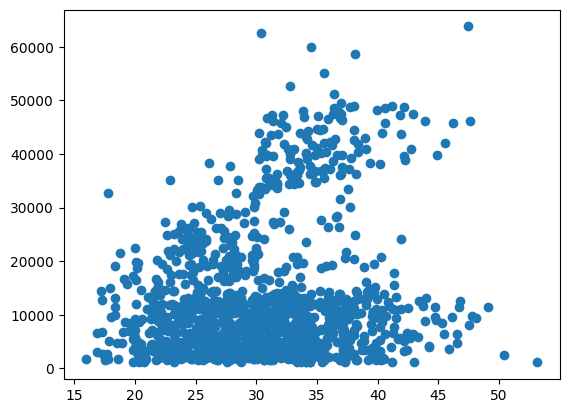

In [11]:
import matplotlib.pyplot as plt

# scatter plots of r/ships betweeen dependent and independent var.
df = df_pos.copy()
plt.scatter(df["bmi"], df["charges"])

In [12]:
# task 3 prepare data for model fitting


df_new = pd.get_dummies(df, prefix=['region'], columns=['region'], dtype = int)
df_new = df_new.drop(columns=['region_southeast'])

df_new['smoker'] = df_new['smoker'].astype('int64')


df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
df_new = df_new.drop(columns=['sex'])

df_new = df_new.dropna()
df_new.head()


,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,27.900,0.0,1,16884.92400,0,0,1,0
1,18.0,33.770,1.0,0,1725.55230,0,0,0,1
2,28.0,33.000,3.0,0,4449.46200,0,0,0,1
3,33.0,22.705,0.0,0,21984.47061,0,1,0,1
4,32.0,28.880,0.0,0,3866.85520,0,1,0,1


In [13]:
# df_new["sex"] = (df_new["sex"] == "male").astype("int64")
# df_new = df_new.drop(columns=["sex"])
# df_new.head()

In [14]:
# df_new["region_southwest"] = (df_new["region_southwest"] == "True").astype("int64")
# df_new.head()

In [15]:
# df_new["region_southwest"].unique()

In [32]:
# fit linear regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, r2_score

# i/o var
X = df_new.drop(columns = ["charges"])
y = df_new["charges"]



# splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# create and train the model
model = LinearRegression()
# model = KernelRidge()
model.fit(X_train, y_train)

# make predictions on test data
y_pred = model.predict(X_test)

# calculate mean squared error
r2_score = r2_score(y_test, y_pred)

# output r2_score
r2_score

0.7049323160872818

In [25]:
# helper function to pre process dataframe
def preprocess_df(df):
  df_new = pd.get_dummies(df, prefix=['region'], columns=['region'], dtype = int)
  df_new = df_new.drop(columns=['region_southeast'])

  df_new["smoker"] = (df_new["smoker"] == "yes")
  df_new['smoker'] = df_new['smoker'].astype('int64')


  df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
  df_new = df_new.drop(columns=['sex'])

  df_new = df_new.dropna()
  df_new.head()

  return df_new

In [18]:
df_new["is_male"].unique()

array([0, 1])

In [31]:
# how model performs on validate data
val_df = pd.read_csv("/content/validation_insuraance_dataset.csv")

val_data = preprocess_df(val_df)

preds = model.predict(val_data)
preds_new = [x if x > 0 else 1000 for x in preds]

validation_data = val_df.copy()

validation_data["predicted_charges"] = preds_new

validation_data

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,352.537878
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,6685.426312
5,70.0,female,72.958351,11.0,yes,southeast,58677.838443
6,29.0,female,32.110000,2.0,no,northwest,7044.405963
7,42.0,female,41.325000,1.0,no,northeast,13065.658004
8,48.0,female,36.575000,0.0,no,northwest,12665.703636
9,63.0,male,33.660000,3.0,no,southeast,16142.541083
